In [47]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

In [84]:
typetags = ['PR'] #'PR', 'PG'
DATA_FOLDER = 'C:/Users/nancy/Documents/MInfoTech/EmotiBitParsedData/'
participants = ['Lucia', 'Steven', 'Nick', 'LindsayDuring', 'LindsayAfter']

In [87]:
def myfunc(n):
  print(f"n is {n}")
  return 2

for typetag in typetags:
    print(f"using PPG type: {typetag}")
    for participant in participants: 
        folder_path = f"{DATA_FOLDER}{participant}"
        ppg = []
        all_files = []
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                all_files.append(os.path.join(root, file))

        for filename in all_files:
            if filename.endswith(f"_{typetag}.csv"):
                file_path = os.path.join(folder_path, filename)
                data = pd.read_csv(file_path, sep=',')
                toadd = data[typetag].to_numpy()
                ppg.append(toadd)
        
        combined_ppg = np.concatenate(ppg)

        minX = min((combined_ppg))
        maxX = max((combined_ppg))
        scaled_ppg = []
        for p in combined_ppg:
            scaled = (p - minX)/(maxX-minX)
            scaled_ppg.append([scaled])
        scaled_ppg = np.concatenate(scaled_ppg)
        print((scaled_ppg))
       

        
        try:
            peaks, info = nk.ppg_peaks(nk.ppg_clean(scaled_ppg, method='elgendi'), sampling_rate=25, method="elgendi", show=False)
            # peaks, info = nk.ppg_peaks(scaled_ppg, sampling_rate=25, method="elgendi", show=True)            
            hrv = nk.hrv_time(peaks, sampling_rate=25, show=False)
            print(f"{participant}'s RMSSD is: {hrv['HRV_RMSSD'].iloc[0]}")
        except Exception as e:
            print(f"{participant}'s data processing fail {e}")
    print()

using PPG type: PR
[0.00510053 0.00508112 0.00509568 ... 0.66320969 0.66319028 0.66315631]
Lucia's RMSSD is: 36940.38981927506
[0.59878191 0.5989963  0.59894757 ... 0.90170532 0.88690314 0.88848178]
Steven's RMSSD is: 35515.251472845965
[7.41409485e-04 7.91845504e-04 7.51496689e-04 ... 8.96152236e-01
 8.96338849e-01 8.96106844e-01]
Nick's RMSSD is: 105063.41459192293
[0.00112593 0.00119335 0.00113267 ... 0.80043419 0.80041396 0.80039374]
LindsayDuring's RMSSD is: nan
[0.42683233 0.46216802 0.50618944 ... 0.05318591 0.0524792  0.05348228]
LindsayAfter's data processing fail index 0 is out of bounds for axis 0 with size 0



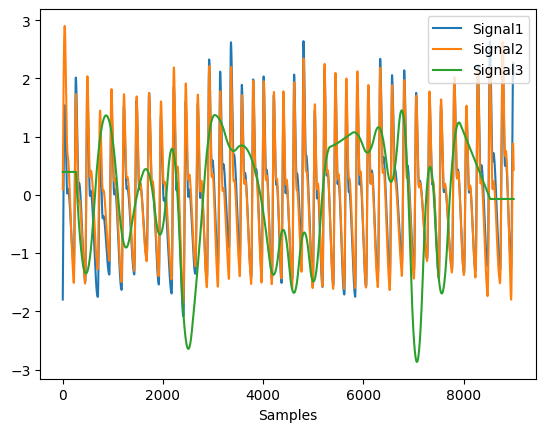

In [33]:
import neurokit2 as nk

ppg = nk.ppg_simulate(duration=30, sampling_rate=300, heart_rate=80)

ppg_cleaned = nk.ppg_clean(ppg, sampling_rate=300)

quality = nk.ppg_quality(ppg_cleaned, sampling_rate=300, method="templatematch")

nk.signal_plot([ppg,ppg_cleaned, quality], standardize=True)

In [4]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


In [5]:
# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,696.395349,62.135891,10.060728,60.275036,NaN,NaN,NaN,NaN,69.697983,69.779109,...,60.0,0.891502,660.0,740.0,14.651163,49.302326,470.0,1420.0,7.962963,234.375


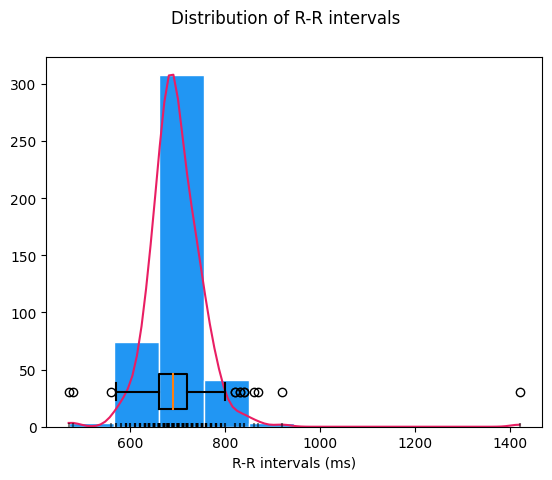

In [6]:
hrv_indices = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_indices